In [80]:
# General imports and widgets
import os
if os.getcwd().split('/')[-1] != 'deepARTransit':
    os.chdir('../..')
import sys
import warnings
import numpy as np
import matplotlib.pylab as plt
from pixlc import plotting
import ipywidgets as widgets

plt.rcParams['figure.figsize'] = (16, 6)
plt.rcParams['font.size'] = 15
warnings.simplefilter("ignore")

# Project dir selection widget

project_button = widgets.RadioButtons(
    options=[os.path.join('.'), # local git repo
             os.path.join('/','Users','Mario','mount_test','deepARTransit') # cobweb         
],
    #value=experiment_folder,
    # rows=10,
    description='\t\t',
    disabled=False
)

# Experiment selection widget

experiment_button = widgets.RadioButtons(
    options=[os.path.join('cobweb', 'deeparsys_fulltime'),
             os.path.join('cobweb', 'deepartrans_fulltime'), 
             os.path.join('cobweb', 'rlc', 'deeparsys_nocov'),
             os.path.join('cobweb', 'rlc', 'deeparsys_cent'),
             os.path.join('cobweb', 'rlc', 'deeparsys_cent_2'),
             os.path.join('cobweb', 'rlc','deeparsys_pix'),
             os.path.join('cobweb', 'rlc','deeparsys_cent_pix'),
             os.path.join('cobweb', 'rlc','deeparsys_cent_24537600'),
             os.path.join('cobweb', 'rlc','deeparsys_cent_22808832'),
             os.path.join('cobweb', 'rlc','deeparsys_cent_27773440'),
],
    #value=experiment_folder,
    # rows=10,
    description='\t\t',
    disabled=False
)

In [81]:
#project directory for loading the data
project_button

RadioButtons(description='\t\t', options=('.', '/Users/Mario/mount_test/deepARTransit'), value='.')

In [82]:
#Select an experime
experiment_button

RadioButtons(description='\t\t', options=('cobweb/deeparsys_fulltime', 'cobweb/deepartrans_fulltime', 'cobweb/…

In [89]:
from utils.config import get_config_file, process_config
from deepartransit.data_handling import data_generator

experiment_folder = experiment_button.value
project_dir = project_button.value
experiment_dir = os.path.join(project_dir, 'deepartransit', 'experiments', experiment_folder)
print(experiment_dir)
config_file = get_config_file(experiment_dir)
config = process_config(config_file)
print('Data and covariates shapes:')
data = data_generator.DataGenerator(config)
width = int(np.sqrt(data.Z.shape[0]))



/Users/Mario/mount_test/deepARTransit/deepartransit/experiments/cobweb/rlc/deeparsys_cent_27773440
Data and covariates shapes:
(1, 690, 1) (1, 690, 2)


In [90]:
os.listdir(os.path.join(project_dir, config.output_dir))

['loc_array_30.npy',
 'scales_array_30.npy',
 'pred_array_30.npy',
 'loc_array_60.npy',
 'scales_array_60.npy',
 'pred_array_60.npy',
 'loc_array_90.npy',
 'scales_array_90.npy',
 'pred_array_90.npy',
 'loc_array_120.npy',
 'scales_array_120.npy',
 'pred_array_120.npy',
 'loc_array_150.npy',
 'scales_array_150.npy',
 'pred_array_150.npy',
 'loc_array_180.npy',
 'scales_array_180.npy',
 'pred_array_180.npy',
 'loc_array_210.npy',
 'scales_array_210.npy',
 'pred_array_210.npy',
 'loc_array_240.npy',
 'scales_array_240.npy',
 'pred_array_240.npy',
 'loc_array_270.npy',
 'scales_array_270.npy',
 'pred_array_270.npy',
 'loc_array_300.npy',
 'scales_array_300.npy',
 'pred_array_300.npy',
 'loc_array_330.npy',
 'scales_array_330.npy',
 'pred_array_330.npy',
 'loc_array_360.npy',
 'scales_array_360.npy',
 'pred_array_360.npy',
 'loc_array_390.npy',
 'scales_array_390.npy',
 'pred_array_390.npy',
 'loc_array_420.npy',
 'scales_array_420.npy',
 'pred_array_420.npy',
 'loc_array_450.npy',
 'scale

In [92]:
d = {}
for fn in [s for s in os.listdir(os.path.join(project_dir, config.output_dir)) if (s[:4] == 'pred')][:200]:
    step = fn.split('_')[-1].split('.')[0]
    d[step] = np.load(os.path.join(project_dir, config.output_dir, fn)).mean(axis=0)
    #pred_instr = traces_array.mean(axis=(0))
    #length_pred = pred_instr.shape[1]
    #plc_trans = data.Z[:, config.pretrans_length:config.pretrans_length+config.trans_length+1]

In [93]:
step_list = sorted([int(k) for k in d if ]
sorted_preds = [d[k] for k in sorted(d.keys())]
sorted_preds[0].shape, len(sorted_preds)

SyntaxError: invalid syntax (<ipython-input-93-20c5fbe8eb99>, line 1)

In [ ]:
step_selection = widgets.SelectionSlider(
    options=sorted(list(np.array(list(d.keys()), dtype=np.int64))),
    #value='sunny side up',
    description='step: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)
step_selection

(0.7, 0.99)

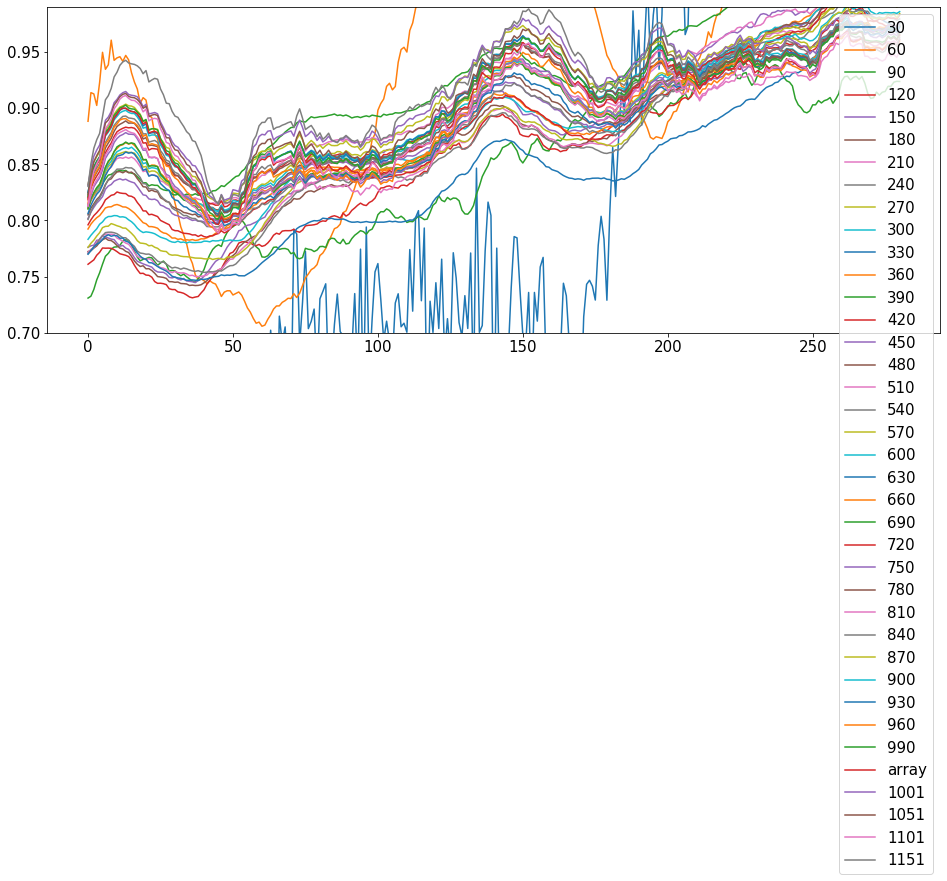

In [99]:
for k, pred in d.items():
    plt.plot(pred[0], label=k)
plt.legend()
plt.ylim(0.7, 0.99)